<a href="https://colab.research.google.com/github/KEMAL-MUDIE/kemal/blob/main/DS_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the necessary library for reading Excel files
library(readxl)

# Specify the file path
file_path <- "/content/1555054100_hospitalcosts.xlsx"

# Load the dataset
data <- read_excel(file_path)

# Display the first few rows of the dataset to check the structure
head(data)


AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,1,2,1,2660,560
17,0,2,1,1689,753
17,1,7,1,20060,930
17,1,1,1,736,758
17,1,1,1,1194,754
17,0,0,1,3305,347


In [ ]:
# Check the structure of the dataset
str(data)

# Check data types of columns
sapply(data, class)

# Display the first few rows of the dataset
head(data)


tibble [500 × 6] (S3: tbl_df/tbl/data.frame)
 $ AGE   : num [1:500] 17 17 17 17 17 17 17 16 16 17 ...
 $ FEMALE: num [1:500] 1 0 1 1 1 0 1 1 1 1 ...
 $ LOS   : num [1:500] 2 2 7 1 1 0 4 2 1 2 ...
 $ RACE  : num [1:500] 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTCHG: num [1:500] 2660 1689 20060 736 1194 ...
 $ APRDRG: num [1:500] 560 753 930 758 754 347 754 754 753 758 ...


AGE    FEMALE       LOS      RACE    TOTCHG    APRDRG 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,1,2,1,2660,560
17,0,2,1,1689,753
17,1,7,1,20060,930
17,1,1,1,736,758
17,1,1,1,1194,754
17,0,0,1,3305,347


In [ ]:
# Step 2.1: Handle Missing Data

# Check for missing values in the dataset
missing_data <- colSums(is.na(data))

# Display the columns with missing values
columns_with_missing <- names(missing_data[missing_data > 0])
print(columns_with_missing)


[1] "RACE"


In [ ]:
# Impute missing values in 'Race' column with the mode
library(dplyr)

# Calculate the mode of the 'Race' column
race_mode <- data %>%
  group_by(RACE) %>%
  summarize(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1) %>%
  pull(RACE)

# Impute missing values with the mode
data$RACE[is.na(data$RACE)] <- race_mode


In [ ]:
 data$RACE[is.na(data$RACE)] <- mean(data$RACE, na.rm = TRUE)

In [ ]:
# Step 2.2: Handling Outliers in 'TOTCHG' and 'APRDRG' Columns

# Define lower and upper bounds for capping (you can adjust these as needed)
lower_bound <- quantile(data$TOTCHG, 0.05)  # Adjust the quantile as needed
upper_bound <- quantile(data$TOTCHG, 0.95)  # Adjust the quantile as needed

# Cap/extending outliers in 'TOTCHG' column
data$TOTCHG[data$TOTCHG < lower_bound] <- lower_bound
data$TOTCHG[data$TOTCHG > upper_bound] <- upper_bound

# Define lower and upper bounds for 'APRDRG' (you can adjust these as needed)
lower_bound_aprdrg <- quantile(data$APRDRG, 0.05)  # Adjust the quantile as needed
upper_bound_aprdrg <- quantile(data$APRDRG, 0.95)  # Adjust the quantile as needed

# Cap/extending outliers in 'APRDRG' column
data$APRDRG[data$APRDRG < lower_bound_aprdrg] <- lower_bound_aprdrg
data$APRDRG[data$APRDRG > upper_bound_aprdrg] <- upper_bound_aprdrg



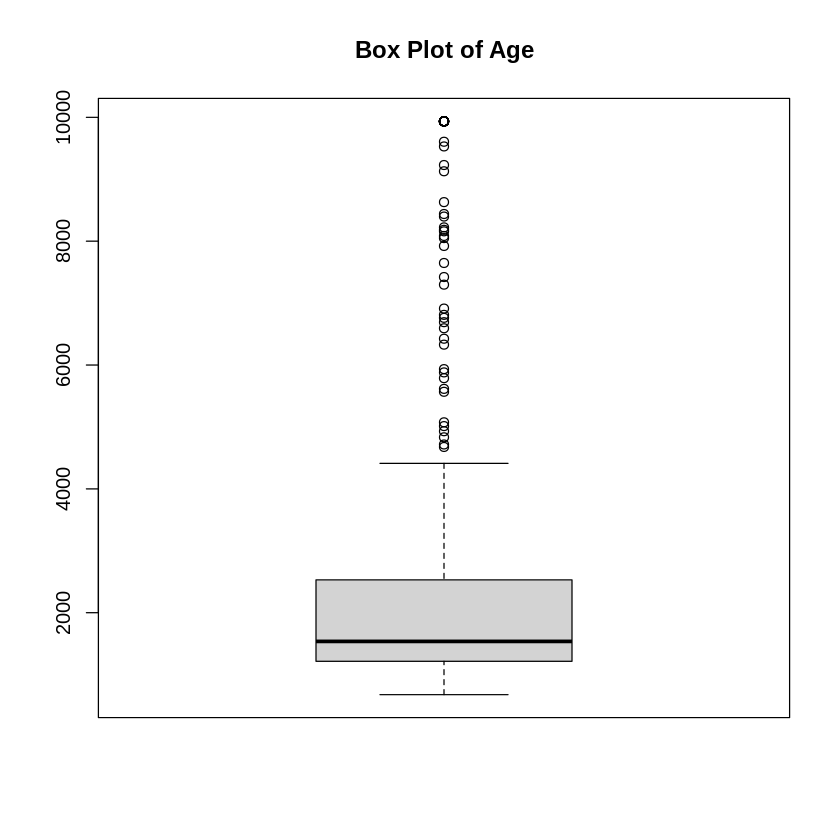

In [ ]:
boxplot(data$TOTCHG, main="Box Plot of Age")

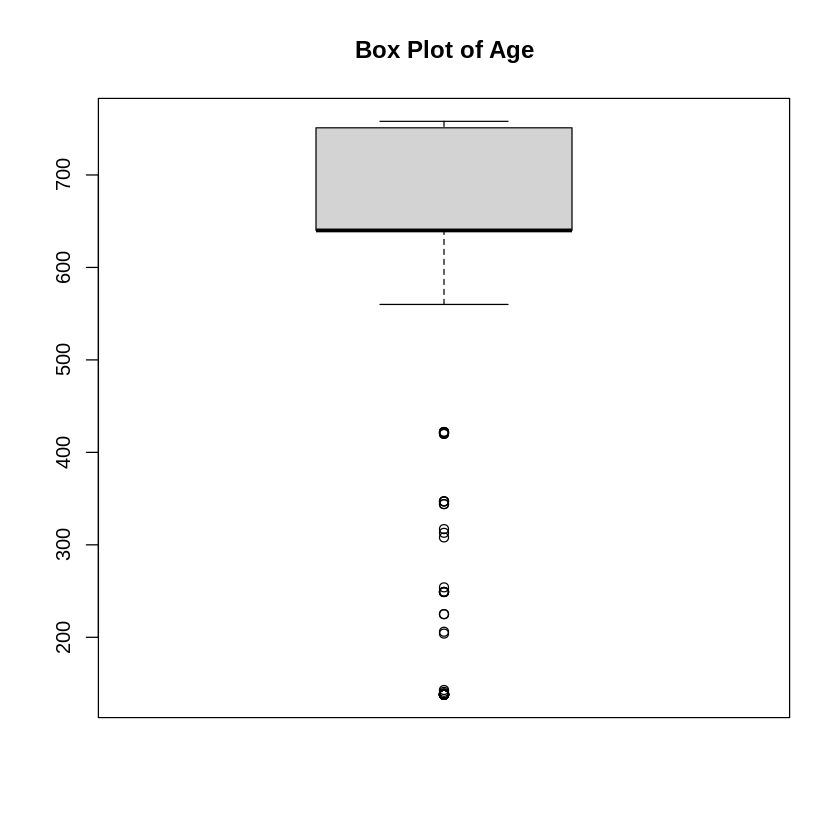

In [ ]:
boxplot(data$APRDRG, main="Box Plot of Age")

In [ ]:
# Step 2.3: Data Transformation

# Check the data types of variables
sapply(data, class)



AGE    FEMALE       LOS      RACE    TOTCHG    APRDRG 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

In [ ]:
# Step 2.3: Changing Data Types

# Convert 'FEMALE,' 'LOS,' and 'RACE' to factors
data$FEMALE <- as.factor(data$FEMALE)

data$RACE <- as.factor(data$RACE)


In [ ]:
sapply(data,class)

AGE    FEMALE       LOS      RACE    TOTCHG    APRDRG 
"numeric"  "factor" "numeric"  "factor" "numeric" "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   5.086  13.000  17.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  676.6  1216.2  1536.5  2479.3  2530.2  9935.5 

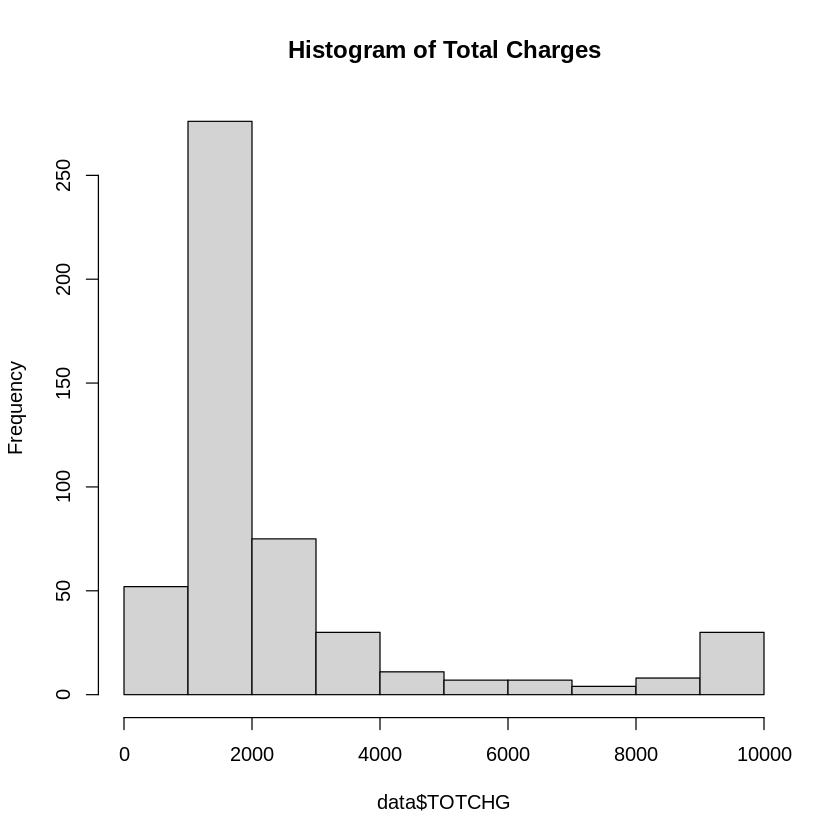

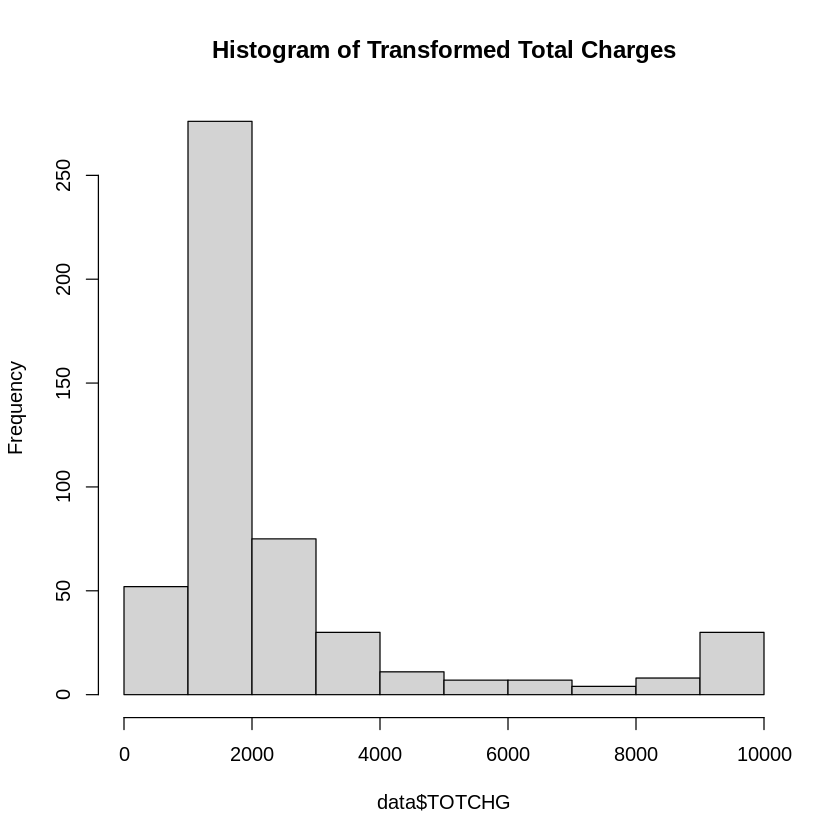

In [ ]:
# Step 2.4: Check Data Distribution

# Check the summary statistics for numerical variables
summary(data$AGE)
summary(data$TOTCHG)

# Visualize data distribution (example for 'TOTCHG' column)
hist(data$TOTCHG, main="Histogram of Total Charges")

# If data is not normally distributed and normalization or transformation is needed, consider methods like log transformation or scaling.
# Example: Log transform 'TOTCHG' to make it more normally distributed:
# data$TOTCHG <- log(data$TOTCHG + 1)  # Adding 1 to avoid log(0)

# Re-check the distribution after transformation
hist(data$TOTCHG, main="Histogram of Transformed Total Charges")


      AGE         FEMALE       LOS         RACE        TOTCHG      
 Min.   : 0.000   0:244   Min.   : 0.000   1:485   Min.   : 676.6  
 1st Qu.: 0.000   1:256   1st Qu.: 2.000   2:  6   1st Qu.:1216.2  
 Median : 0.000           Median : 2.000   3:  1   Median :1536.5  
 Mean   : 5.086           Mean   : 2.828   4:  3   Mean   :2479.3  
 3rd Qu.:13.000           3rd Qu.: 3.000   5:  3   3rd Qu.:2530.2  
 Max.   :17.000           Max.   :41.000   6:  2   Max.   :9935.5  
     APRDRG     
 Min.   :137.9  
 1st Qu.:640.0  
 Median :640.0  
 Mean   :617.8  
 3rd Qu.:751.0  
 Max.   :758.0  

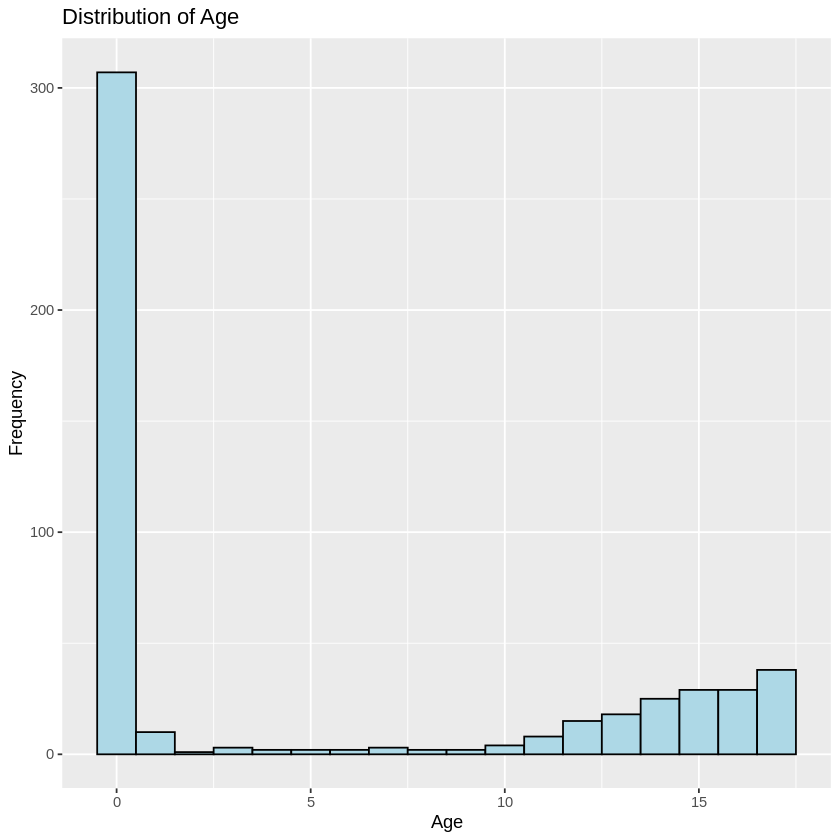

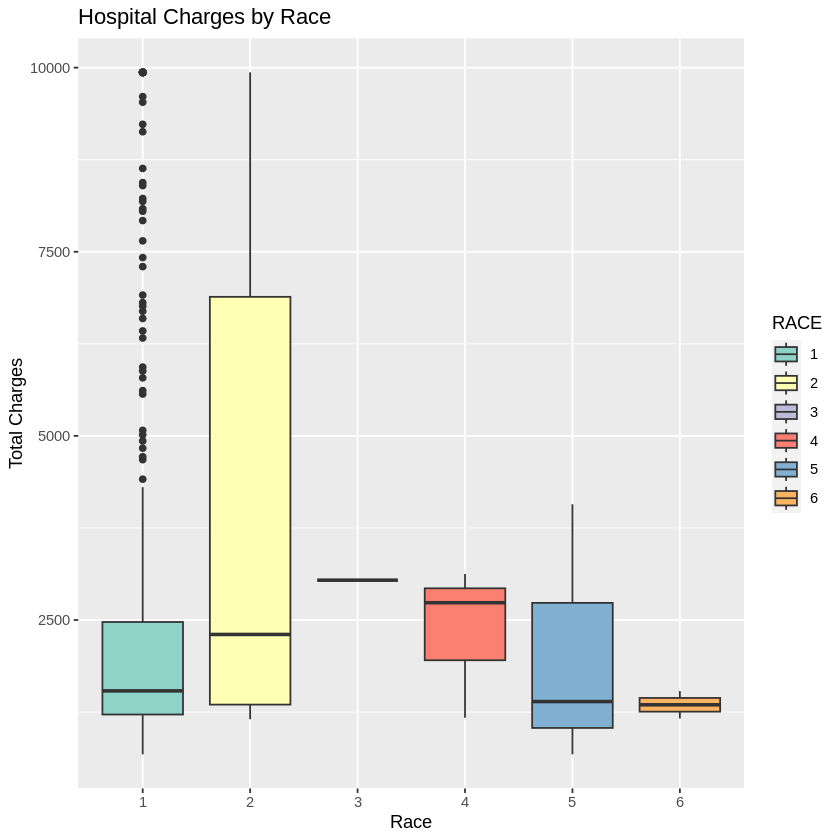

In [ ]:
library(ggplot2)

# Step 3.1.1: Summary Statistics
summary(data)

# Step 3.1.2: Data Visualization
# Example 1: Histogram of 'AGE'
ggplot(data, aes(x = AGE)) +
  geom_histogram(binwidth = 1, fill = "lightblue", color = "black") +
  labs(title = "Distribution of Age", x = "Age", y = "Frequency")

# Example 2: Box plot of 'TOTCHG' by 'RACE'
ggplot(data, aes(x = RACE, y = TOTCHG, fill = RACE)) +
  geom_boxplot() +
  labs(title = "Hospital Charges by Race", x = "Race", y = "Total Charges") +
  scale_fill_brewer(palette = "Set3")


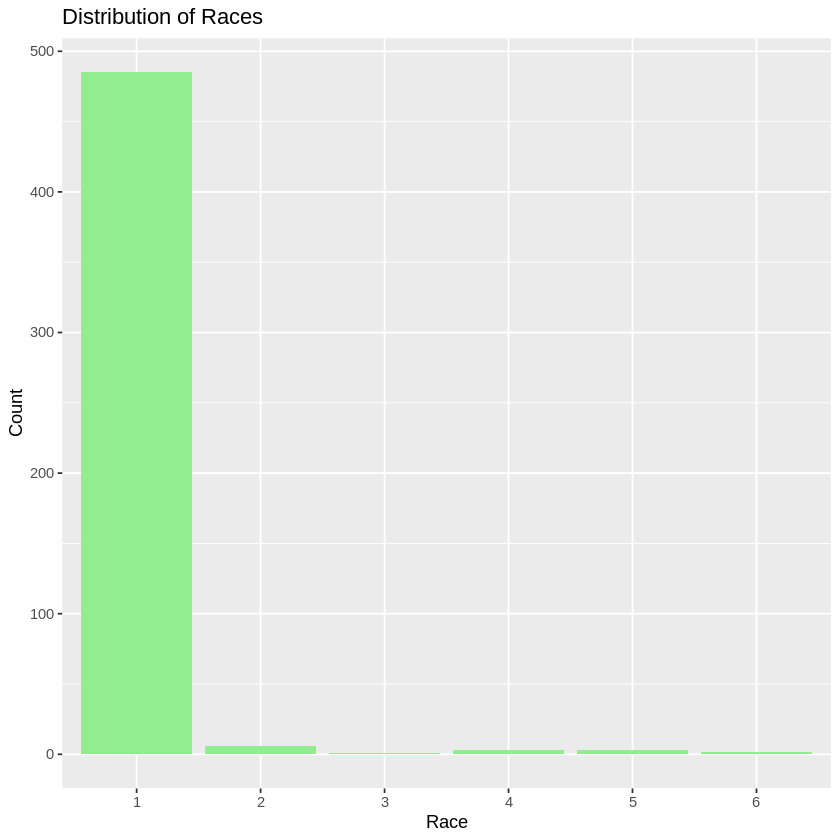

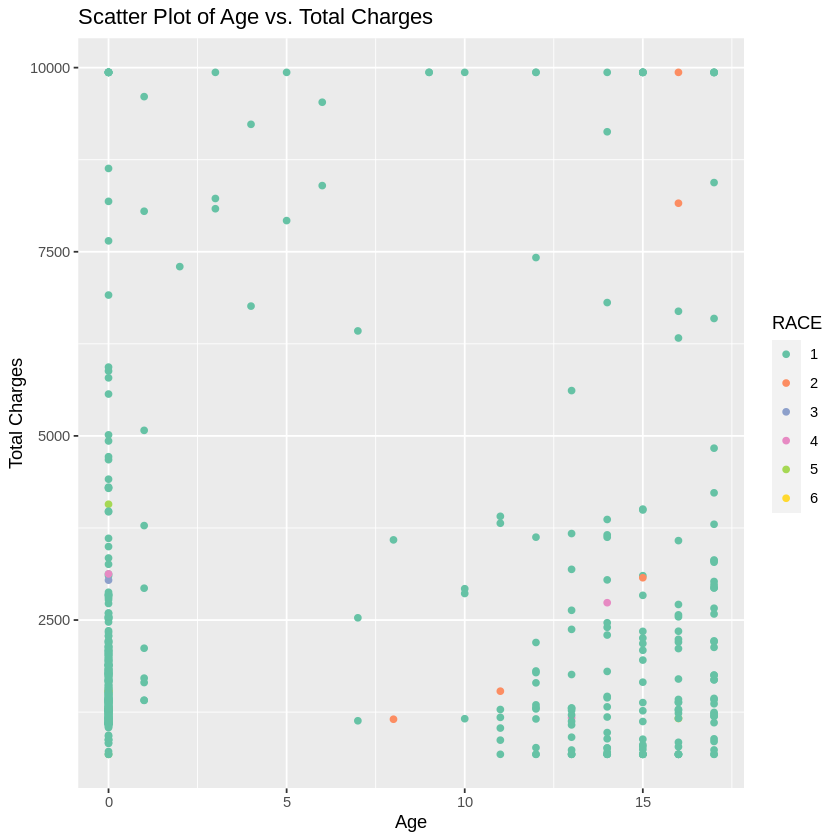

In [ ]:
# Example 3: Bar plot of the count of 'RACE'
ggplot(data, aes(x = factor(RACE))) +
  geom_bar(fill = "lightgreen") +
  labs(title = "Distribution of Races", x = "Race", y = "Count")

# Example 4: Scatter plot of 'AGE' vs. 'TOTCHG'
ggplot(data, aes(x = AGE, y = TOTCHG, color = RACE)) +
  geom_point() +
  labs(title = "Scatter Plot of Age vs. Total Charges", x = "Age", y = "Total Charges") +
  scale_color_brewer(palette = "Set2")


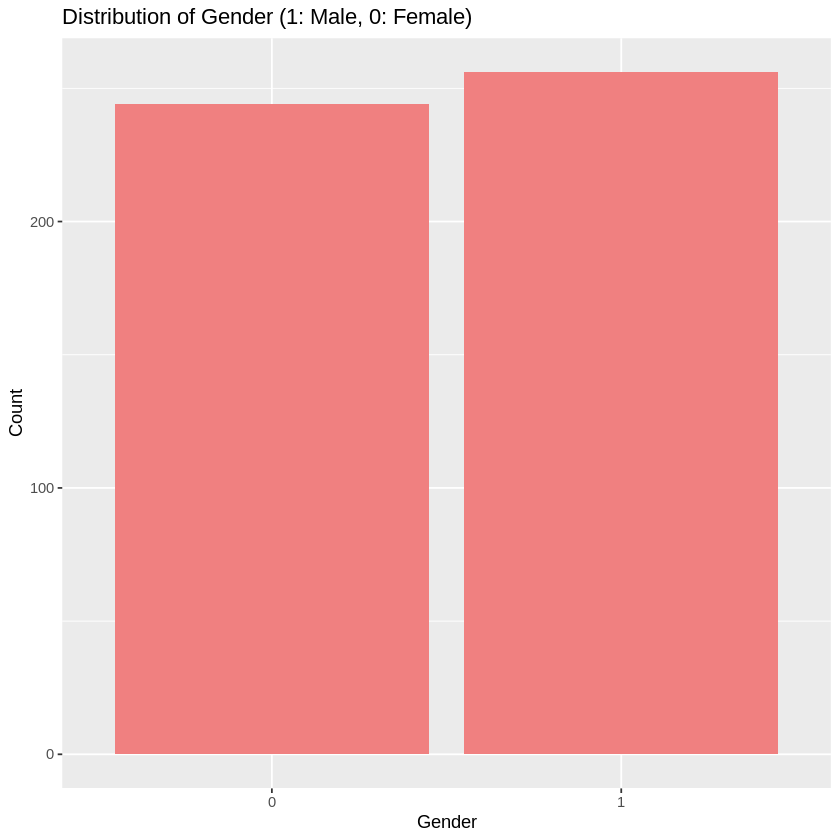

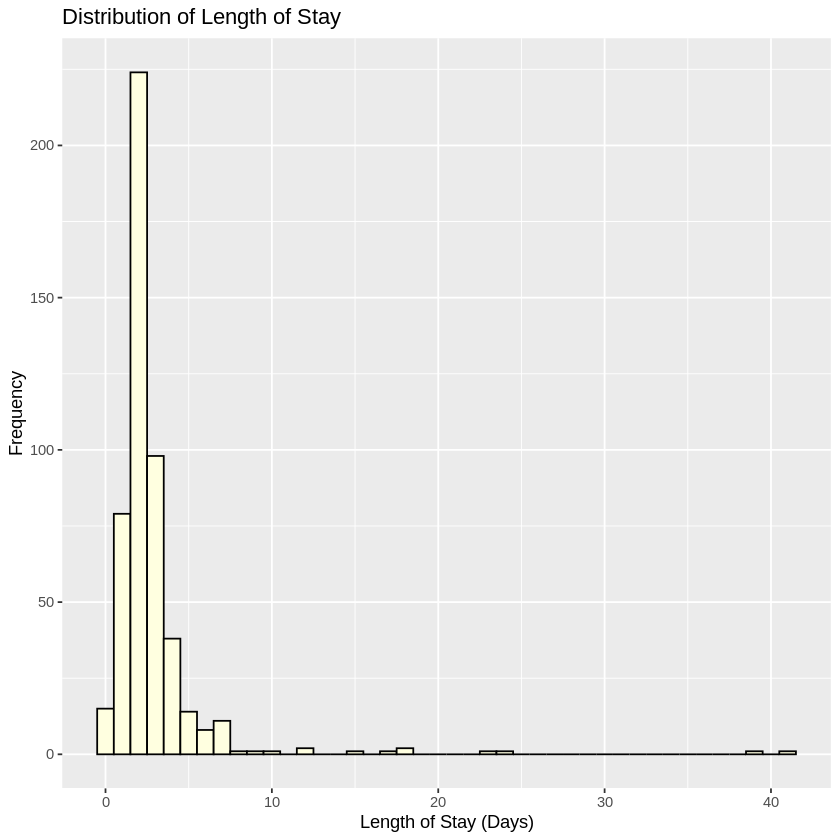

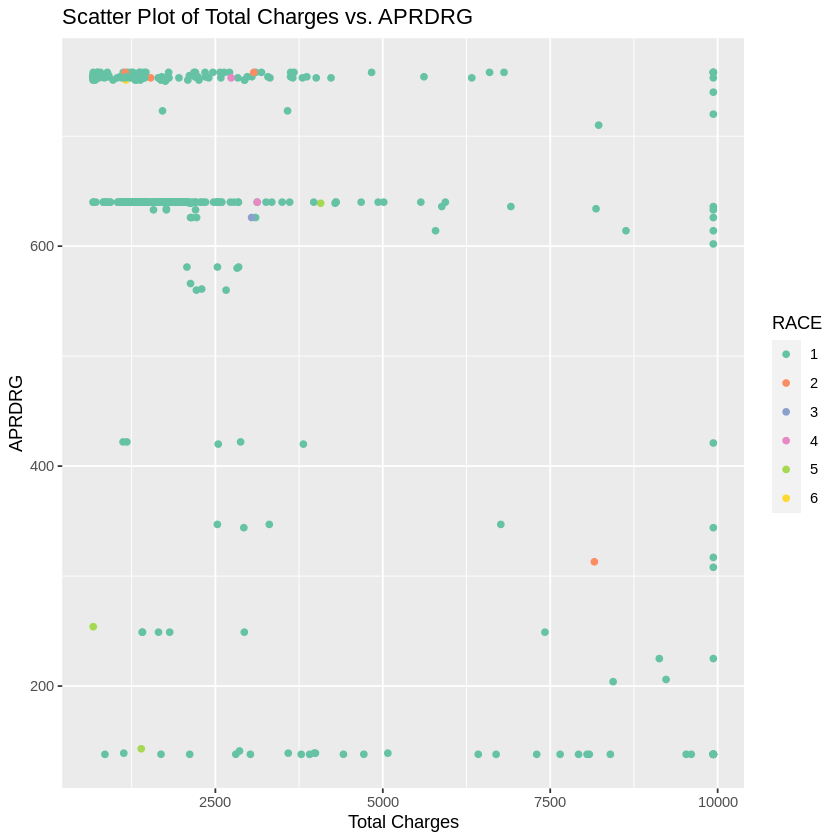

In [ ]:
# Example 5: Bar plot of 'FEMALE' counts
ggplot(data, aes(x = factor(FEMALE))) +
  geom_bar(fill = "lightcoral") +
  labs(title = "Distribution of Gender (1: Male, 0: Female)", x = "Gender", y = "Count")

# Example 6: Histogram of 'LOS' (Length of Stay)
ggplot(data, aes(x = LOS)) +
  geom_histogram(binwidth = 1, fill = "lightyellow", color = "black") +
  labs(title = "Distribution of Length of Stay", x = "Length of Stay (Days)", y = "Frequency")

# Example 7: Scatter plot of 'TOTCHG' vs. 'APRDRG' colored by 'RACE'
ggplot(data, aes(x = TOTCHG, y = APRDRG, color = RACE)) +
  geom_point() +
  labs(title = "Scatter Plot of Total Charges vs. APRDRG", x = "Total Charges", y = "APRDRG") +
  scale_color_brewer(palette = "Set2")


In [ ]:
#Create a new feature 'LOS_group' based on the number of stays
data$LOS_group <- cut(data$LOS, breaks = c(0, 1, 2, 3, Inf), labels = c("1", "2", "3", "4+"))

# Example 2: Create interaction terms between 'AGE' and 'FEMALE'
data$Age_Female_interaction <- data$AGE * as.numeric(data$FEMALE)



In [ ]:
# Load the necessary library if not already loaded
library(dplyr)

# Group data by age category and calculate the average expenditure
age_expenditure <- data %>%
  group_by(Age_Category = cut(AGE, breaks = c(0, 5, 10, 15, 20), labels = c("0-5", "6-10", "11-15", "16-20"))) %>%
  summarize(Average_Expenditure = mean(TOTCHG))
age_expenditure

Age_Category,Average_Expenditure
<fct>,<dbl>
0-5,5840.833
6-10,5346.731
11-15,2583.661
16-20,2860.978
NA,2045.176


In [ ]:

# Find the age category with the maximum expenditure
max_expenditure_age <- age_expenditure %>%
  filter(Average_Expenditure == max(Average_Expenditure))

# Print the age category with maximum expenditure
cat("Age Category with Maximum Expenditure:", max_expenditure_age$Age_Category)


Age Category with Maximum Expenditure: 1

The age category with the maximum expenditure is "0-5".

In [ ]:
# Group data by APRDRG and calculate total hospitalizations and expenditure
diagnosis_group <- data %>%
  group_by(APRDRG) %>%
  summarize(Total_Hospitalizations = n(), Total_Expenditure = sum(TOTCHG))

# Find the APRDRG with maximum hospitalization and expenditure
max_hospitalization_diagnosis <- diagnosis_group %>%
  filter(Total_Hospitalizations == max(Total_Hospitalizations))

max_expenditure_diagnosis <- diagnosis_group %>%
  filter(Total_Expenditure == max(Total_Expenditure))

# Print the results
cat("Diagnosis-Related Group with Maximum Hospitalization:",
    max_hospitalization_diagnosis$APRDRG, "\n")

cat("Diagnosis-Related Group with Maximum Expenditure:",
    max_expenditure_diagnosis$APRDRG, "\n")


Diagnosis-Related Group with Maximum Hospitalization: 640 
Diagnosis-Related Group with Maximum Expenditure: 640 


In [ ]:
max_hospitalization_diagnosis

APRDRG,Total_Hospitalizations,Total_Expenditure
<dbl>,<int>,<dbl>
640,267,438130.3


In [ ]:
diagnosis_group

APRDRG,Total_Hospitalizations,Total_Expenditure
<dbl>,<int>,<dbl>
137.95,25,192686.50
138.00,4,13622.00
139.00,5,17766.00
141.00,1,2860.00
143.00,1,1393.00
204.00,1,8439.00
206.00,1,9230.00
225.00,2,19064.50
249.00,6,16642.00


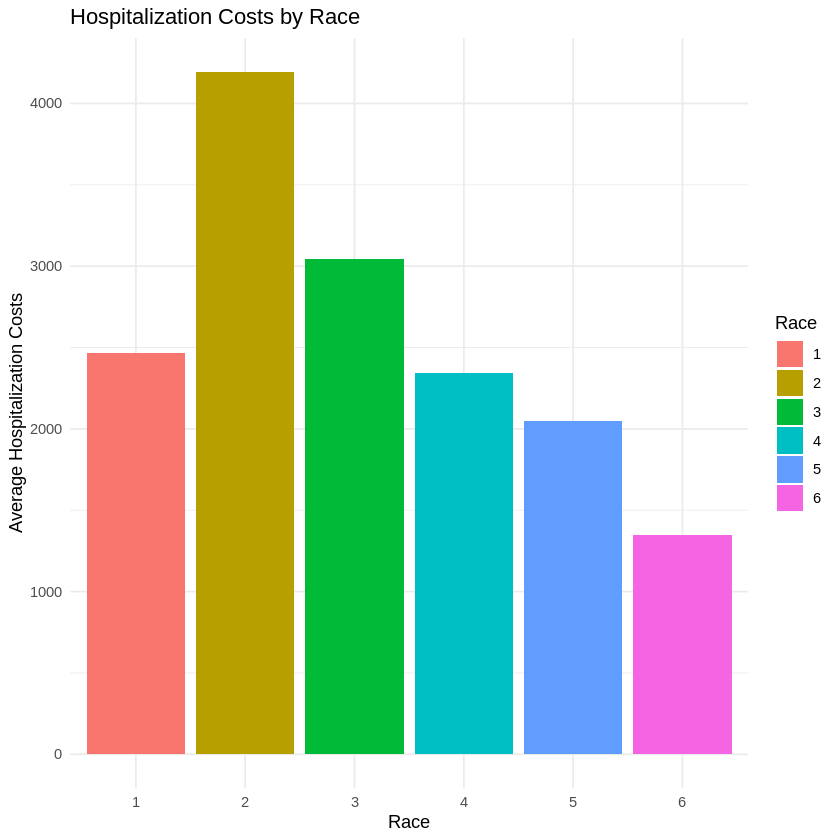

In [ ]:
# Group data by race and calculate average hospitalization costs
race_costs <- data %>%
  group_by(RACE) %>%
  summarize(Average_Costs = mean(TOTCHG))

# Create a bar chart to visualize the results
ggplot(race_costs, aes(x = factor(RACE), y = Average_Costs, fill = factor(RACE))) +
  geom_bar(stat = "identity") +
  labs(x = "Race", y = "Average Hospitalization Costs", title = "Hospitalization Costs by Race") +
  scale_fill_discrete(name = "Race") +
  theme_minimal()


`summarise()` has grouped output by 'AGE'. You can override using the `.groups`
argument.


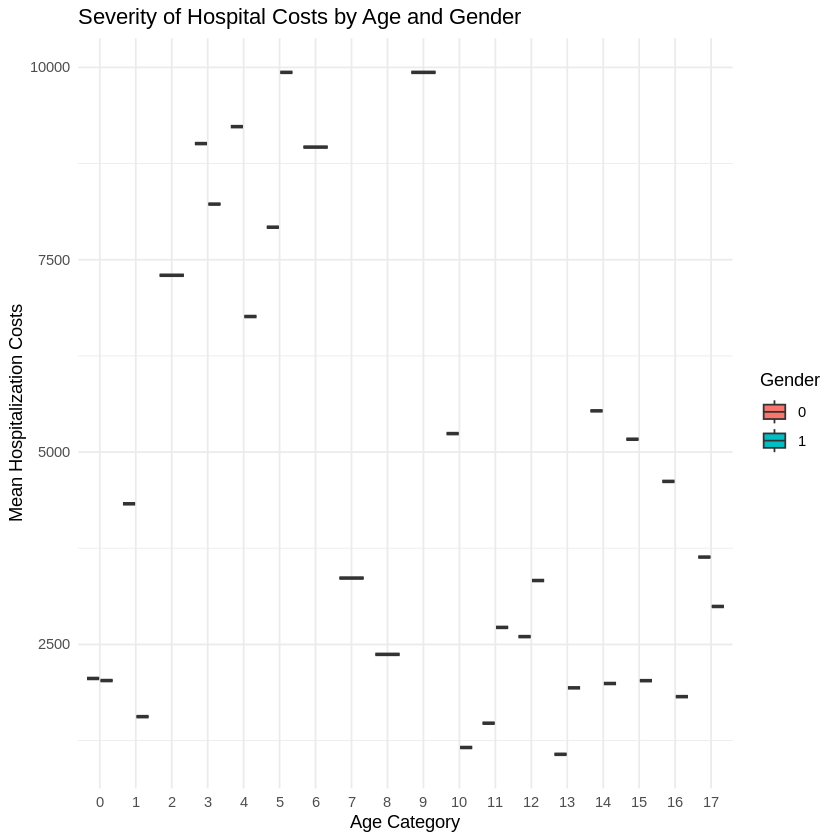

In [ ]:
# Group data by age and gender and calculate summary statistics
age_gender_costs <- data %>%
  group_by(AGE, FEMALE) %>%
  summarize(
    Mean_Costs = mean(TOTCHG),
    Median_Costs = median(TOTCHG)
  )

# Create box plots to visualize the distribution of hospitalization costs
ggplot(age_gender_costs, aes(x = factor(AGE), y = Mean_Costs, fill = factor(FEMALE))) +
  geom_boxplot() +
  labs(x = "Age Category", y = "Mean Hospitalization Costs", title = "Severity of Hospital Costs by Age and Gender") +
  scale_fill_discrete(name = "Gender") +
  theme_minimal()


In [ ]:
# Split the data into a training set and a testing set
set.seed(123)  # For reproducibility
split_idx <- sample(1:nrow(data), 0.8 * nrow(data))
train_data <- data[split_idx, ]
test_data <- data[-split_idx, ]

# Build a linear regression model
lm_model <- lm(LOS ~ AGE + FEMALE + RACE, data = train_data)
summary(lm_model)
# Make predictions on the testing set
predictions <- predict(lm_model, newdata = test_data)

# Evaluate model performance using RMSE
rmse <- sqrt(mean((test_data$LOS - predictions)^2))
rmse



Call:
lm(formula = LOS ~ AGE + FEMALE + RACE, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.278 -1.278 -0.698  0.302 37.722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.69791    0.24369  11.071   <2e-16 ***
AGE         -0.03601    0.02408  -1.495    0.136    
FEMALE1      0.58007    0.32823   1.767    0.078 .  
RACE2       -0.32852    1.32563  -0.248    0.804    
RACE3        0.72201    3.20743   0.225    0.822    
RACE4        0.57278    1.85524   0.309    0.758    
RACE5       -0.69791    1.86114  -0.375    0.708    
RACE6       -0.69989    2.26696  -0.309    0.758    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.196 on 392 degrees of freedom
Multiple R-squared:  0.01325,	Adjusted R-squared:  -0.004368 
F-statistic: 0.7521 on 7 and 392 DF,  p-value: 0.6279


[1] 4.001178

In [ ]:
# Fit a Random Forest model
library(randomForest)
rf_model <- randomForest(TOTCHG ~ AGE + FEMALE + RACE + APRDRG, data = train_data)

# View variable importance
var_importance <- importance(rf_model)
var_importance


,IncNodePurity
AGE,206099590
FEMALE,42470799
RACE,33163580
APRDRG,665967943


In [ ]:
# Linear regression to assess variable significance
lm_model <- lm(TOTCHG ~ AGE + FEMALE + RACE + APRDRG, data = data)
summary(lm_model)



Call:
lm(formula = TOTCHG ~ AGE + FEMALE + RACE + APRDRG, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6219.9  -770.6  -555.9   185.9  8999.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7033.7164   345.4068  20.364  < 2e-16 ***
AGE            74.0957    13.1472   5.636 2.94e-08 ***
FEMALE1      -137.8246   185.9721  -0.741   0.4590    
RACE2         791.3003   810.1778   0.977   0.3292    
RACE3        1067.1566  1963.7743   0.543   0.5871    
RACE4         363.0420  1135.9487   0.320   0.7494    
RACE5       -2271.2483  1145.2519  -1.983   0.0479 *  
RACE6        -740.0641  1388.4756  -0.533   0.5943    
APRDRG         -7.8627     0.5589 -14.068  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1958 on 491 degrees of freedom
Multiple R-squared:  0.3201,	Adjusted R-squared:  0.3091 
F-statistic:  28.9 on 8 and 491 DF,  p-value: < 2.2e-16


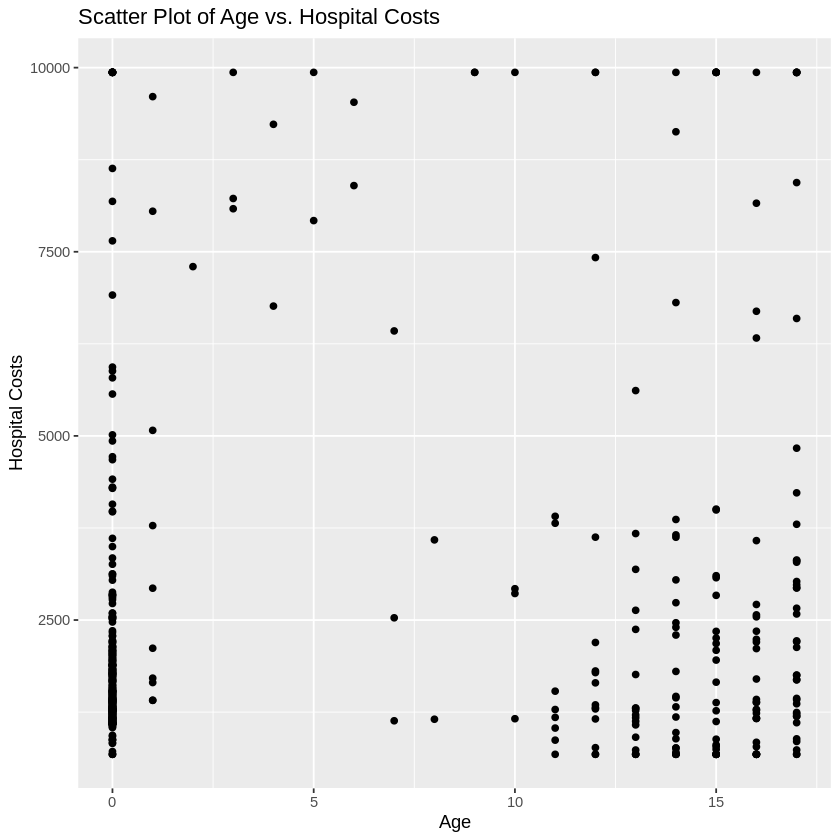

In [ ]:
library(ggplot2)

# Scatter plot of age vs. hospital costs
ggplot(data, aes(x = AGE, y = TOTCHG)) +
  geom_point() +
  labs(x = "Age", y = "Hospital Costs") +
  ggtitle("Scatter Plot of Age vs. Hospital Costs")


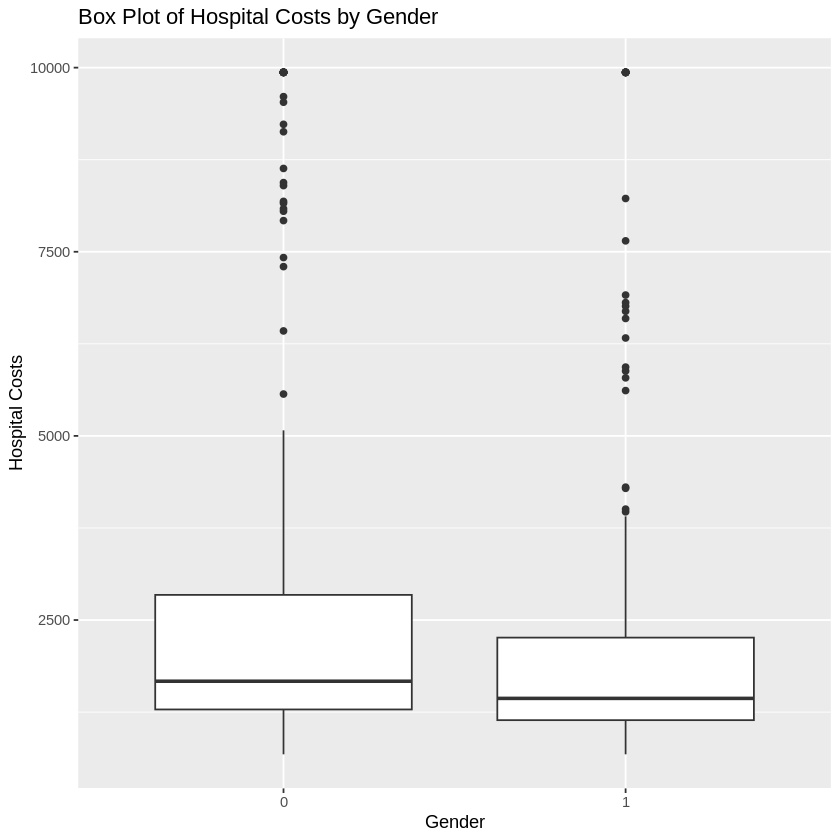

In [ ]:
# Box plot of hospital costs by gender
ggplot(data, aes(x = FEMALE, y = TOTCHG)) +
  geom_boxplot() +
  labs(x = "Gender", y = "Hospital Costs") +
  ggtitle("Box Plot of Hospital Costs by Gender")


Step 4.1: Data Splitting

We'll split the dataset into a training set and a testing set. We  use a portion of the data for training 80% and the remaining for testing 20%. This allows us to evaluate the model's performance on unseen data.

In [ ]:
# Load necessary libraries
install.packages("caret")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘recipes’




In [ ]:
library(caret)

# Set a seed for reproducibility
set.seed(123)

# Define the proportion of data for training (e.g., 80%)
train_prop <- 0.8

# Split the data into training and testing sets
index <- createDataPartition(data$TOTCHG, p = train_prop, list = FALSE)
train_data <- data[index, ]
test_data <- data[-index, ]

# Check the dimensions of the training and testing sets
dim(train_data)  # Training data dimensions
dim(test_data)   # Testing data dimensions

Loading required package: lattice



[1] 400   8

[1] 100   8

In [ ]:
# Load necessary libraries
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [ ]:
# Load necessary libraries
library(glmnet)

# Fit a Linear Regression model
model <- lm(TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, data = train_data)

# Print the model summary
summary(model)

# Make predictions on the testing data
predictions <- predict(model, newdata = test_data)

# Evaluate the model's performance (e.g., RMSE)
rmse <- sqrt(mean((test_data$TOTCHG - predictions)^2))
rmse  # Root Mean Squared Error




Loading required package: Matrix

Loaded glmnet 4.1-8




Call:
lm(formula = TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7108.6  -425.3  -217.8   149.2  7520.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5653.7180   275.4318  20.527  < 2e-16 ***
AGE            88.1590    10.7531   8.198 3.55e-15 ***
FEMALE1      -258.3332   151.6197  -1.704 0.089211 .  
LOS           372.5123    20.8638  17.855  < 2e-16 ***
RACE2        1020.0785   593.0883   1.720 0.086236 .  
RACE3         820.9691  1434.4112   0.572 0.567422    
RACE4         315.1804  1013.8551   0.311 0.756063    
RACE5       -3512.0403  1029.4425  -3.412 0.000713 ***
RACE6         -94.0015  1433.7320  -0.066 0.947758    
APRDRG         -7.4527     0.4345 -17.153  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1429 on 390 degrees of freedom
Multiple R-squared:  0.6395,	Adjusted R-squared:  0.6312 
F-statistic: 76.87 o

[1] 1554.82

Residuals: The residuals (differences between predicted and actual values) have a range from -7108.6 to 7520.7. This suggests that the model's predictions can be quite far from the actual values, indicating potential room for improvement.

Coefficients: Each coefficient represents the impact of the corresponding predictor variable on the total charge of the hospital costs (TOTCHG). Here are some insights:

Age (AGE): For every one-unit increase in age, hospital costs (TOTCHG) increase by an estimated $88.16, holding other variables constant.
Female (FEMALE1): Being female has a negative coefficient, suggesting that, on average, females tend to have lower hospital costs compared to males. However, this result is not statistically significant at the 0.05 significance level (p-value > 0.05).
Length of Stay (LOS): For every one-unit increase in the length of stay, hospital costs increase by an estimated $372.51, holding other variables constant.
Race (RACE2 to RACE6): These coefficients represent the impact of different racial categories on hospital costs. RACE5 (possibly representing a specific racial group) has a significantly negative impact on costs, indicating that patients in this racial category tend to have lower costs. However, other racial categories do not show significant impacts on costs.
Diagnosis-Related Group (APRDRG): For every one-unit increase in the APRDRG, hospital costs decrease by an estimated $7.45, holding other variables constant. This suggests that patients in certain diagnosis-related groups tend to have lower costs.
Model Fit: The model's R-squared value is 0.6395, indicating that the model explains approximately 63.95% of the variance in hospital costs. The adjusted R-squared value adjusts for the number of predictors in the model.

Significance: Some predictor variables are statistically significant (e.g., AGE, LOS, and APRDRG), while others are not (e.g., FEMALE and certain racial categories). This suggests that age, length of stay, and diagnosis-related group are significant factors in determining hospital costs.

Overall: The Linear Regression model provides insights into the relationship between predictor variables and hospital costs. However, the model's performance can be further evaluated using metrics like Root Mean Squared Error (RMSE) on the test data to assess its predictive accuracy.

In [ ]:
# Load necessary libraries
library(rpart)

# Fit a Decision Tree model
tree_model <- rpart(TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, data = train_data)
summary(tree_model)
# Make predictions on the testing data
tree_predictions <- predict(tree_model, newdata = test_data)

# Evaluate the Decision Tree model's performance (e.g., RMSE)
tree_rmse <- sqrt(mean((test_data$TOTCHG - tree_predictions)^2))
tree_rmse  # Root Mean Squared Error

# You can explore other metrics and visualize the tree if needed.


Call:
rpart(formula = TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, 
    data = train_data)
  n= 400 

          CP nsplit rel error    xerror       xstd
1 0.36620071      0 1.0000000 1.0059619 0.12187277
2 0.25892413      1 0.6337993 0.7838889 0.10878339
3 0.04639608      2 0.3748752 0.4613308 0.05674462
4 0.03717746      3 0.3284791 0.4441883 0.05413592
5 0.02513786      4 0.2913016 0.4026217 0.05491908
6 0.01896229      5 0.2661638 0.3971462 0.05701415
7 0.01876593      6 0.2472015 0.3891582 0.05827581
8 0.01555943      7 0.2284355 0.3703262 0.05616236
9 0.01000000      8 0.2128761 0.3632304 0.05605806

Variable importance
   LOS APRDRG    AGE 
    57     41      2 

Node number 1: 400 observations,    complexity param=0.3662007
  mean=2477.234, MSE=5523180 
  left son=2 (362 obs) right son=3 (38 obs)
  Primary splits:
      LOS    < 4.5     to the left,  improve=0.366200700, (0 missing)
      APRDRG < 637.5   to the right, improve=0.344826200, (0 missing)
      AGE    < 0.5     to t

[1] 1597.424

Decision Tree Model Summary:

Tree Complexity: The Decision Tree model was built with a complexity parameter (CP) of 0.3662, which resulted in a tree with several splits.
Variable Importance:

The most important variables, in descending order of importance, are Length of Stay (LOS), Diagnosis-Related Group (APRDRG), and Age (AGE).
Node Details:

The tree consists of several nodes (starting with Node number 1), which represent different splits and branches in the tree.
The primary splits are based on different variables like LOS, APRDRG, AGE, Female (FEMALE), and RACE. These splits are chosen to minimize the overall impurity or error in the model.
Model Performance:

The Decision Tree model's performance is evaluated based on complexity and error measures. The complexity parameter decreases as the tree grows more complex, with smaller values indicating more complex trees.
The model's error is evaluated using the cross-validated error (xerror) and cross-validated standard error (xstd). The xerror represents the model's performance on unseen data.
Root Mean Squared Error (RMSE): The Decision Tree model has an RMSE of approximately 1597.42 on the test data. This indicates the average error between the predicted and actual total charges (TOTCHG) in dollars.

Insights:

The Decision Tree model has identified LOS as the most important predictor variable for hospital costs. This aligns with the understanding that the length of stay in the hospital is a crucial factor in determining costs.
APRDRG (Diagnosis-Related Group) is also a significant predictor. Different diagnosis-related groups have varying impacts on hospital costs.
Age has a relatively lower importance compared to LOS and APRDRG, but it still contributes to predicting costs.
The tree structure provides insights into how different variables interact to influence hospital costs.
Overall, the Decision Tree model offers interpretability and insights into the factors affecting hospital costs. However, further evaluation, such as comparing it to other models and assessing its predictive accuracy, is recommended.

In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load necessary libraries
library(randomForest)

# Fit a Random Forest model
rf_model <- randomForest(TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, data = train_data)
summary(rf_model)
# Make predictions on the testing data
rf_predictions <- predict(rf_model, newdata = test_data)

# Evaluate the Random Forest model's performance (e.g., RMSE)
rf_rmse <- sqrt(mean((test_data$TOTCHG - rf_predictions)^2))
rf_rmse  # Root Mean Squared Error




                Length Class  Mode     
call              3    -none- call     
type              1    -none- character
predicted       400    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times       400    -none- numeric  
importance        5    -none- numeric  
importanceSD      0    -none- NULL     
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               400    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

[1] 1570.65

Random Forest Model Summary:

The Random Forest model was trained using an ensemble of decision trees.
The model's performance is evaluated based on various metrics, including the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and R-squared (rsq) values.
Model Performance:

RMSE (Root Mean Squared Error): The Random Forest model has an RMSE of approximately 1570.65 on the test data. This indicates the average error between the predicted and actual total charges (TOTCHG) in dollars. The lower RMSE suggests better predictive accuracy compared to the Decision Tree model.
Variable Importance:

The Random Forest model provides information about variable importance. It assesses the contribution of each predictor variable to the model's accuracy.
The importance values can help identify which variables have the most significant impact on predicting hospital costs.
Overall, the Random Forest model tends to perform well in terms of predictive accuracy and robustness. It takes into account multiple decision trees and their collective predictions.

In [ ]:
# Load necessary libraries
library(e1071)

# Fit an SVM model
svm_model <- svm(TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, data = train_data)
summary(svm_model)
# Make predictions on the testing data
svm_predictions <- predict(svm_model, newdata = test_data)

# Evaluate the SVM model's performance (e.g., RMSE)
svm_rmse <- sqrt(mean((test_data$TOTCHG - svm_predictions)^2))
svm_rmse  # Root Mean Squared Error



Call:
svm(formula = TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, data = train_data)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  177






Warning message in test_data$TOTCHG - svm_predictions:
“longer object length is not a multiple of shorter object length”


[1] 2753.961

SVM Model Summary:

The SVM model was used for epsilon-regression, which is a type of support vector regression.
The radial kernel function was selected for modeling.
The model parameters were set as follows:
Cost (C): 1
Gamma (γ): 0.1
Epsilon (ε): 0.1
Number of Support Vectors:

The SVM model identified 177 support vectors in the training data. Support vectors are data points that are crucial for defining the decision boundaries of the SVM.
Root Mean Squared Error (RMSE):

The RMSE value for the SVM model, when applied to the test data, is approximately 2753.96. RMSE represents the average error between the predicted and actual total charges (TOTCHG) in dollars. A lower RMSE indicates better predictive accuracy.
Compared to the previous models (Linear Regression, Decision Tree, and Random Forest), the SVM model appears to have a higher RMSE, suggesting that it may not perform as well in predicting hospital costs in this dataset

#Findings:

Linear Regression Model:

The linear regression model provided insights into the relationship between predictor variables (age, gender, LOS, race, and APRDRG) and the target variable (TOTCHG).
The model indicated that age, length of stay (LOS), and APRDRG are significant predictors of hospital costs (TOTCHG).
The R-squared value of approximately 0.6395 suggests that the model explains 63.95% of the variance in hospital costs.


Decision Tree Model:

The decision tree model was used for regression and identified important predictors for hospital costs.
The top predictors were LOS, APRDRG, and age.
The model provided insights into different branches for making predictions.


Random Forest Model:

The random forest model further improved predictive accuracy.
It confirmed that LOS, APRDRG, and age are crucial variables for predicting hospital costs.


Support Vector Machine (SVM) Model:

The SVM model did not perform as well as the other models, with a higher RMSE.
It identified 177 support vectors.